# FIFA DataSet Analysis


* Importing Libraries

In [1]:

#Numpy
import numpy as np

# Pandas
import pandas as pd

# BeautifulSoup
from bs4 import BeautifulSoup

# Requests
import requests

# Reges
import regex as re 

# sqlite
import sqlite3 as sql

# MatplotLib
import matplotlib.pyplot as plt

* Web Scrapping


In [2]:
req=requests.get("https://sofifa.com/players?offset=1")
req

<Response [200]>

* BeautifulSoup

In [3]:
soup=BeautifulSoup(req.content)

In [4]:
# Adding the attributes to the array
arr=[]
for i in soup.findAll('td'):
    arr.append(str(i))

* Cleaning Image URL

In [5]:
clean_img=re.sub('<td.*\n.*data-src=.|".*',"",arr[0])
clean_img

'https://cdn.sofifa.net/players/248/474/22_60.png'

In [6]:
# The row is from 0-8
arr[0]

'<td class="col-avatar" data-balloon="Click here!" data-balloon-pos="up" data-balloon-visible=""><figure class="avatar">\n<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/248/474/22_60.png" data-srcset="https://cdn.sofifa.net/players/248/474/22_120.png 2x, https://cdn.sofifa.net/players/248/474/22_180.png 3x" data-type="player" id="248474" src="https://cdn.sofifa.net/players/notfound_0_60.png"/></figure></td>'

* Cleaning Name

In [7]:
clean_name=re.sub('<td.*\n.*s">|<\/div.*>',"",arr[1])
clean_name

'T. Anjorin'

* Cleaning Age

In [8]:
clean_age=re.sub('<td.*e">|<.*>',"",arr[11])
clean_age

'23'

* Cleaning OVA

In [9]:
clean_ova=re.sub('<td.*p.*">|<.*>',"",arr[3])
clean_ova

'64'

* Cleaning POT

In [10]:
clean_pot=re.sub('<td.*p.*">|<.*>',"",arr[4])
clean_pot

'80'

* Cleaning Team & Contract

In [11]:
clean_team=re.sub('<td.*\n<d.*\n<i.*\n</f.*\n.*/">|<.*\n.*>\n.*>\n.*>',"",arr[5])
clean_team

'Huddersfield Town'

* Cleaning Value

In [12]:
clean_value=re.sub('<td.*">|<.*>',"",arr[6])
clean_value

'€1.5M'

* Cleaning Wage

In [13]:
clean_wage=re.sub('<td.*">|<.*>',"",arr[7])
clean_wage

'€1K'

* Cleaning Total

In [14]:
clean_total=re.sub('<td.*">|<.*>',"",arr[8])
clean_total

'1681'

* Looping through the data

In [15]:
#0-8
img=[]
name=[]
age=[]
ova=[]
pot=[]
team=[]
value=[]
wage=[]
total=[]

count=0
for j in range(1,20):
    url=f"https://sofifa.com/players?offset={j}"
    req=requests.get(url)
    soup=BeautifulSoup(req.content)
    
    for i in soup.findAll('td'):
        clean_img=re.sub('<td.*\n.*data-src=.|".*',"",str(i))
        clean_name=re.sub('<td.*\n.*s">|<\/div.*>',"",str(i))
        clean_age=re.sub('<td.*e">|<.*>',"",str(i))
        clean_ova=re.sub('<td.*p.*">|<.*>',"",str(i))
        clean_pot=re.sub('<td.*p.*">|<.*>',"",str(i))
        clean_team=re.sub('<td.*\n<d.*\n<i.*\n</f.*\n.*/">|<.*\n.*>\n.*>\n.*>',"",str(i))
        clean_value=re.sub('<td.*">.|.<.*>',"",str(i))
        clean_wage=re.sub('<td.*">.|.<.*>',"",str(i))
        clean_total=re.sub('<td.*">|<.*>',"",str(i))
        
        if count==0:
            img.append(clean_img)
            count+=1
        elif count==1:
            name.append(clean_name)
            count+=1
        elif count==2:
            age.append(clean_age)
            count+=1
        elif count==3:
            ova.append(clean_ova)
            count+=1
        elif count==4:
            pot.append(clean_pot)
            count+=1
        elif count==5:
            team.append(clean_team)
            count+=1
        elif count==6:
            value.append(clean_value)
            count+=1
        elif count==7:
            wage.append(clean_wage)
            count+=1
        else:
            count=0
            total.append(clean_total)
        


* Type casting

In [16]:
fifa=pd.DataFrame({'Image':img,'Name':name,'Age':age,'OVA':ova,'POT':pot,'Team':team,'Value (M$)':value,'Wage (K$)':wage,'Total':total})
fifa['Age']=pd.to_numeric(fifa['Age'])
fifa['OVA']=pd.to_numeric(fifa['OVA'])
fifa['POT']=pd.to_numeric(fifa['POT'])
fifa['Value (M$)']=pd.to_numeric(fifa['Value (M$)'])
fifa['Wage (K$)']=pd.to_numeric(fifa['Wage (K$)'])
fifa['Total']=pd.to_numeric(fifa['Total'])

In [17]:
# Getting the basic info for the DF
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image       1140 non-null   object 
 1   Name        1140 non-null   object 
 2   Age         1140 non-null   int64  
 3   OVA         1140 non-null   int64  
 4   POT         1140 non-null   int64  
 5   Team        1140 non-null   object 
 6   Value (M$)  1140 non-null   float64
 7   Wage (K$)   1140 non-null   int64  
 8   Total       1140 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 80.3+ KB


In [18]:
# Shape of the DF
fifa.shape

(1140, 9)

*Droping the Image url column from the DF

In [19]:
# Remmoving the Image column
fifa.drop(columns=["Image"],inplace=True,axis=1)

* 1st 20 datapoints

In [20]:
fifa.head(20)

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
0,T. Anjorin,19,64,80,Huddersfield Town,1.5,1,1681
1,C. Nkunku,23,86,89,RB Leipzig,93.0,110,2199
2,A. Knauff,19,71,82,Eintracht Frankfurt,4.0,17,1740
3,R. Nelson,21,72,79,Feyenoord,4.8,39,1746
4,O. Kökçü,20,78,85,Feyenoord,27.5,10,2058
5,N. Zalewski,19,68,82,Roma,2.9,10,1697
6,Cristiano Ronaldo,36,91,91,Manchester United,45.0,270,2188
7,L. Sinisterra,22,78,84,Feyenoord,22.5,13,2009
8,A. Tchouaméni,21,81,88,AS Monaco,52.0,46,2141
9,C. Dessers,26,74,75,Feyenoord,5.0,16,1753


* Last 20 Datapoints

In [21]:
fifa.tail(20)

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
1120,J. Musiala,18,79,89,FC Bayern München,37.0,26,1911
1121,Gonçalo Ramos,20,74,87,SL Benfica,10.0,10,1885
1122,G. Scamacca,22,78,84,U.S. Sassuolo Calcio,23.0,34,1856
1123,A. Hložek,18,77,87,AC Sparta Praha,22.0,50,1929
1124,Ansu Fati,18,79,90,FC Barcelona,37.0,56,1904
1125,T. Abraham,23,80,85,Roma,32.0,57,1828
1126,N. Zaniolo,21,79,87,Roma,39.5,46,2066
1127,P. Pogba,28,86,86,Manchester United,68.0,200,2196
1128,Diogo Costa,21,77,86,FC Porto,20.5,7,1107
1129,I. Konaté,22,80,88,Liverpool,44.5,85,1737


* Statistical Data

In [22]:
fifa.describe()

,Age,OVA,POT,Value (M$),Wage (K$),Total
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,21.379825,79.969298,87.651754,47.277982,76.387719,1959.837719
std,3.676150,5.820246,3.270474,37.188700,84.383696,177.919626
min,16.000000,64.000000,75.000000,1.500000,1.000000,1107.000000
25%,19.000000,77.000000,86.000000,20.500000,16.000000,1856.000000
50%,21.000000,80.000000,88.000000,37.000000,48.000000,1987.000000
75%,22.000000,83.000000,90.000000,68.000000,110.000000,2085.000000
max,36.000000,92.000000,95.000000,194.000000,450.000000,2257.000000


# Analysis

* Display and drop all the duplicated datas

In [23]:
fifa.duplicated().sum()
fifa.drop_duplicates(inplace=True)

* Player who is having the highest wage?

In [24]:
fifa[fifa['Wage (K$)']==max(fifa['Wage (K$)'])]

# K. Benzema is the player with highest wage


,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
38,K. Benzema,33,91,91,Real Madrid CF,84.0,450,2145


* Find the youngest player(s)

In [25]:
# Youngest player
fifa[fifa['Age']==min(fifa['Age'])]

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
10,Gavi,16,77,89,FC Barcelona,24.0,14,1970
33,Y. Moukoko,16,69,89,Borussia Dortmund,3.8,5,1725
50,N. Mbamba,16,64,88,Club Brugge KV,1.7,50,1546


* Find the oldest player(s)

In [26]:
# Oldest player
fifa[fifa['Age']==max(fifa['Age'])][['Name',"Age"]]

,Name,Age
6,Cristiano Ronaldo,36


* List out the Top 10 players according to their POT

In [27]:
fifa.sort_values(by="POT", ascending=False)['Name'].head(10)

57             K. Mbappé
36            E. Haaland
837           F. de Jong
30              P. Foden
28                 Pedri
599       R. Lewandowski
14              L. Messi
38            K. Benzema
6      Cristiano Ronaldo
49            K. Havertz
Name: Name, dtype: object

* Create a new DataFrame with the values of columns - Name & POT

In [28]:
new_df=fifa[['Name','POT']]
new_df

,Name,POT
0,T. Anjorin,80
1,C. Nkunku,89
2,A. Knauff,82
3,R. Nelson,79
4,O. Kökçü,85
...,...,...
837,F. de Jong,92
959,T. Nianzou,85
1018,B. Kamara,86
1077,V. van Dijk,90


* Plot a graph for Player's name Vs Player's POT

<BarContainer object of 10 artists>

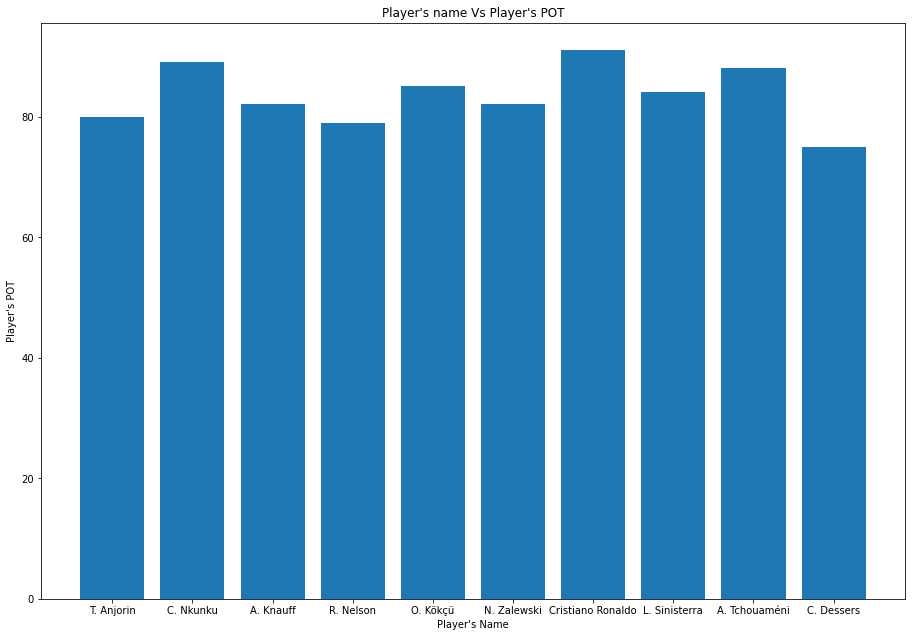

In [36]:
x=fifa['Name'].head(10)
y=fifa['POT'].head(10)
fig=plt.figure()
fig.add_axes([2,2,2,2])
plt.title("Player's name Vs Player's POT")
plt.xlabel("Player's Name")
plt.ylabel("Player's POT")
plt.bar(x,y)